In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress


In [2]:
#read the saved data:
music_df=pd.read_csv("../Resources/all_data_genre.csv", encoding = "Latin-1")
music_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music


# Question 1- 

## Spotify Music Number 1

In [3]:
music_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'Deezer Album ID', 'Deezer Genre'],
      dtype='object')

In [4]:
no1_spotify= music_df.loc[music_df["in_spotify_charts"]== 1]
no1_spotify.dropna(how='any')
no1_spotify.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
196,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",2,2023,6,2,277,1,39666245,1,...,Major,59,26,60,46,1,25,13,448581475,Rap/Hip Hop
221,Mejor Que Yo,"Mambo Kingz, DJ Luian, Anuel Aa",3,2023,5,4,675,1,50847624,9,...,Minor,62,56,66,18,0,12,5,434186667,Reggaeton
447,Malvadï¿½ï¿,"Xamï¿½ï¿½, Gustah, Neo B",3,2021,11,30,648,1,240684449,14,...,Minor,82,52,61,38,0,14,27,0,NaN
485,ELEVEN,IVE,1,2021,12,1,521,1,247737946,17,...,Major,83,59,73,6,0,5,11,276725452,Asian Music
559,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,1,14,1034,1,245400167,19,...,Minor,67,74,75,44,0,7,30,0,NaN


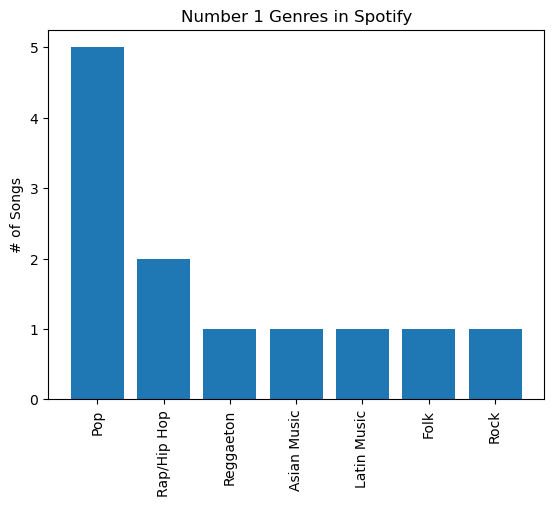

In [5]:
no1_spotify_genre= no1_spotify["Deezer Genre"].value_counts()
plt.bar(no1_spotify_genre.index,no1_spotify_genre)
plt.xticks(rotation=90)
plt.title("Number 1 Genres in Spotify")
plt.ylabel("# of Songs")
plt.savefig("../Output/Number 1 Genre in Spotify_Q1.png")
plt.show()

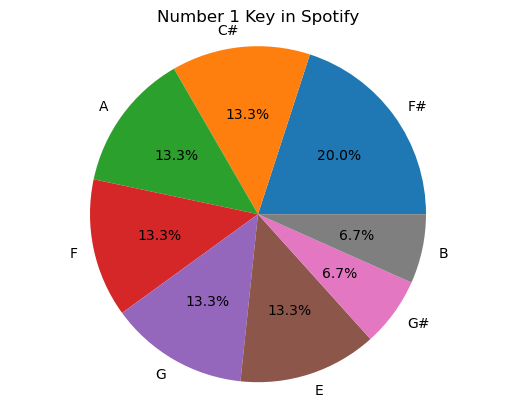

In [6]:
## Make a pie graph for no1 spotify key 
no1_spotify_key= no1_spotify["key"].value_counts()
plt.pie(no1_spotify_key, labels=no1_spotify_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Spotify")
plt.savefig("../Output/Number 1 Key in Spotify_Q1.png")
plt.show()

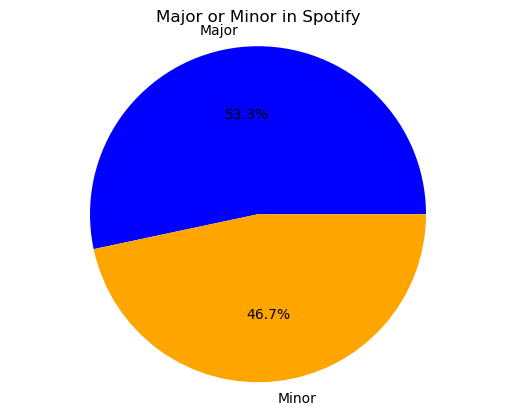

In [7]:
## Major or minor
no1_spotify_mode=no1_spotify["mode"].value_counts()
color=["blue","orange"]
plt.pie(no1_spotify_mode,labels=no1_spotify_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Spotify")
plt.savefig("../Output/Major or Minor in Spotify_Q1.png")
plt.show()

In [8]:
## Make a list for Spotify bpm
sbpm_0to59=[]
sbpm_60to79=[]
sbpm_80to99=[]
sbpm_100to119=[]
sbpm_120to139=[]
sbpm_140to159=[]
sbpm_160to179=[]
sbpm_180to200=[]
for index, row in no1_spotify.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        sbpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        sbpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        sbpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        sbpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        sbpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        sbpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        sbpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        sbpm_180to200.append(row)
    

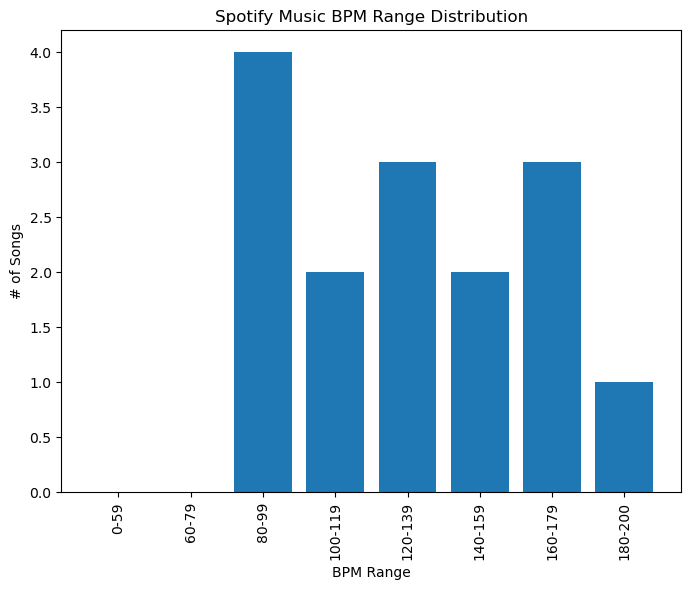

In [9]:
## Make a bar chart on the Spotify music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(sbpm_0to59), len(sbpm_60to79), len(sbpm_80to99), len(sbpm_100to119),
          len(sbpm_120to139), len(sbpm_140to159), len(sbpm_160to179), len(sbpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Spotify Music BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("../Output/Spotify BPM Range Distribution_Q1.png")
plt.show()

## APPLE Music Number 1

In [10]:
no1_apple=music_df.loc[music_df["in_apple_charts"]==1]
no1_apple.dropna(how='any')
no1_apple.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
247,Lovers Rock,TV Girl,1,2014,6,5,6339,13,466231982,3,...,Minor,56,57,87,0,1,10,4,318676647,Pop
266,SORRY NOT SORRY,"Tyler, The Creator",2,2023,3,31,709,0,58473276,8,...,Minor,48,50,80,40,0,37,20,67115762,Pop
314,Zona De Perigo,Leo Santana,1,2022,12,8,531,4,134294498,20,...,Major,81,97,77,75,0,35,3,387589897,Brazilian Music
318,Sem Alianï¿½ï¿½a no,"MC Xenon, Os Gemeos da Putaria",2,2022,12,23,454,4,93587665,6,...,Major,53,40,36,73,0,11,33,0,NaN
341,"Hey, Mickey!",Baby Tate,1,2016,9,27,482,0,122763672,9,...,Major,92,73,51,55,0,15,6,459773235,Rap/Hip Hop


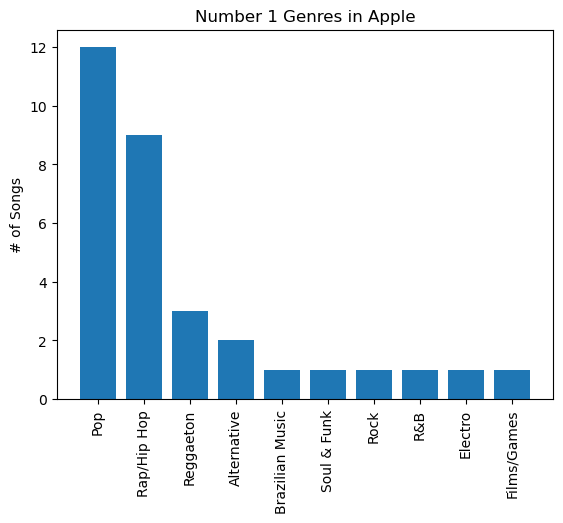

In [11]:
## Make a bar graph for no 1 apple music genre
no1_apple_genre= no1_apple["Deezer Genre"].value_counts()
plt.bar(no1_apple_genre.index,no1_apple_genre)
plt.xticks(rotation=90)
plt.title("Number 1 Genres in Apple")
plt.ylabel("# of Songs")
plt.savefig("../Output/Number 1 Genre in Apple_Q1.png")
plt.show()

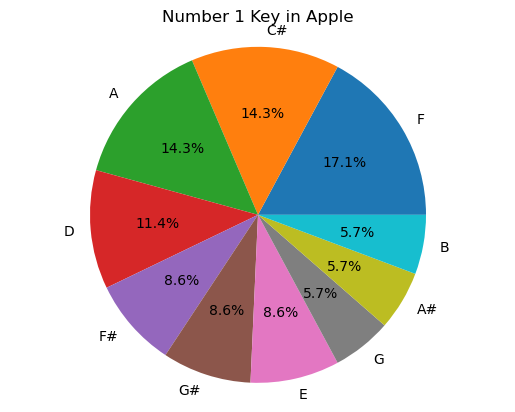

In [12]:
## Make a pie graph for no 1 apple music key
no1_apple_key= no1_apple["key"].value_counts()
plt.pie(no1_apple_key, labels=no1_apple_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Apple")
plt.savefig("../Output/Number 1 Key in Apple_Q1.png")
plt.show()

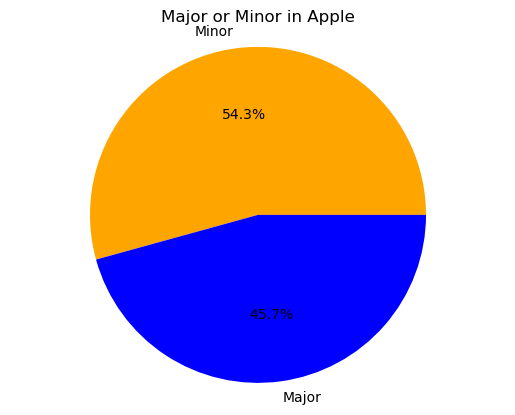

In [13]:
## Major or minor
no1_apple_mode=no1_apple["mode"].value_counts()
color=["orange","blue"]
plt.pie(no1_apple_mode,labels=no1_apple_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Apple")
plt.savefig("../Output/Major or Minor in Apple_Q1.png")
plt.show()

In [14]:
## Make a list for Apple bpm
abpm_0to59=[]
abpm_60to79=[]
abpm_80to99=[]
abpm_100to119=[]
abpm_120to139=[]
abpm_140to159=[]
abpm_160to179=[]
abpm_180to200=[]
for index, row in no1_apple.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        abpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        abpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        abpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        abpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        abpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        abpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        abpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        abpm_180to200.append(row)
    

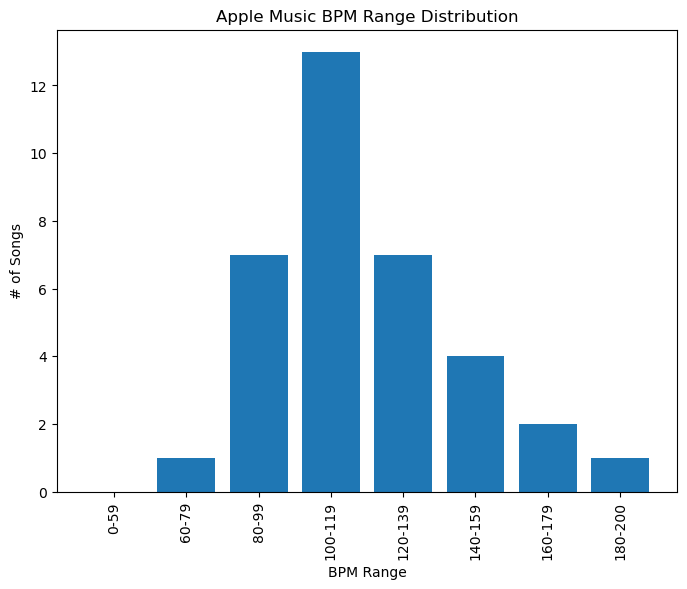

In [15]:
## Make a bar chart on the Apple music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(abpm_0to59), len(abpm_60to79), len(abpm_80to99), len(abpm_100to119),
          len(abpm_120to139), len(abpm_140to159), len(abpm_160to179), len(abpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Apple Music BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("../Output/Apple BPM Range Distribution_Q1.png")
plt.show()

## DEEZER Music Number 1

In [16]:
no1_deezer=music_df.loc[music_df["in_deezer_charts"]==1]
no1_deezer.dropna(how='any')
no1_deezer.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
18,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,Major,69,82,76,6,0,6,3,0,NaN
24,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,Major,52,52,68,46,0,15,4,402287647,Country
26,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,Minor,74,35,84,0,0,11,6,349702977,NaN


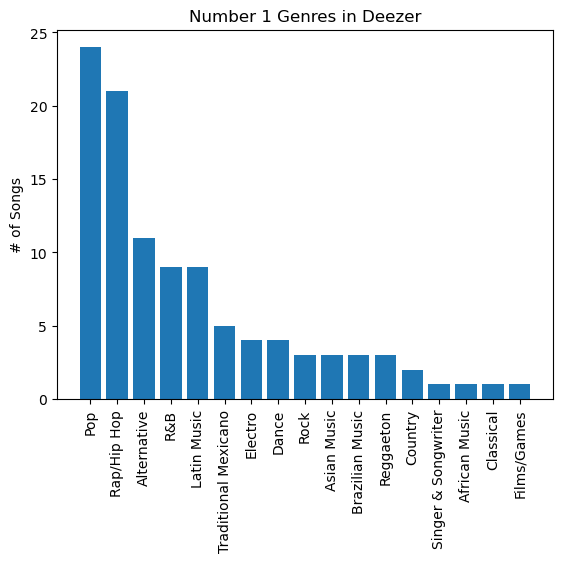

In [17]:
## Make a pie graph for deezer no 1 music genre
no1_deezer_genre= no1_deezer["Deezer Genre"].value_counts()
plt.bar(no1_deezer_genre.index,no1_deezer_genre)
plt.title("Number 1 Genres in Deezer")
plt.xticks(rotation=90)
plt.ylabel("# of Songs")
plt.savefig("../Output/Number 1 Genre in Deezer_Q1.png")
plt.show()

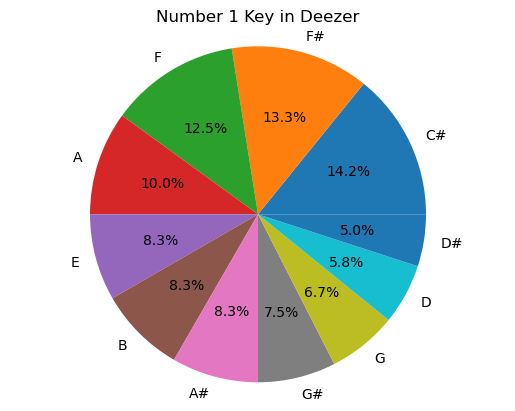

In [18]:
# Make a pie graph for deezer no 1 key
no1_deezer_key= no1_deezer["key"].value_counts()
plt.pie(no1_deezer_key, labels=no1_deezer_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Deezer")
plt.savefig("../Output/Deezer Number Key_Q1.png")
plt.show()

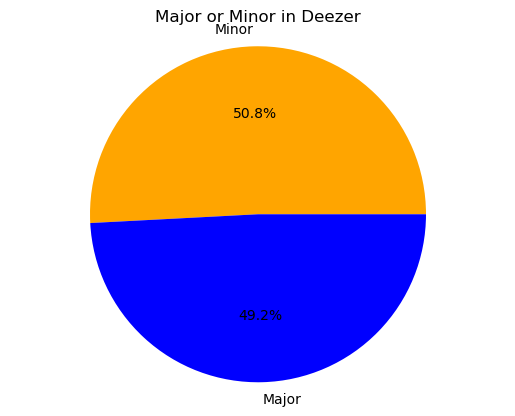

In [19]:
## Major or minor
no1_deezer_mode=no1_deezer["mode"].value_counts()
color=["orange","blue"]
plt.pie(no1_deezer_mode,labels=no1_deezer_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Deezer")
plt.savefig("../Output/Deezer Major or Minor_Q1.png")
plt.show()

In [20]:
## Make a list for Deezer bpm
dbpm_0to59=[]
dbpm_60to79=[]
dbpm_80to99=[]
dbpm_100to119=[]
dbpm_120to139=[]
dbpm_140to159=[]
dbpm_160to179=[]
dbpm_180to200=[]
for index, row in no1_deezer.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        dbpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        dbpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        dbpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        dbpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        dbpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        dbpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        dbpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        dbpm_180to200.append(row)
    

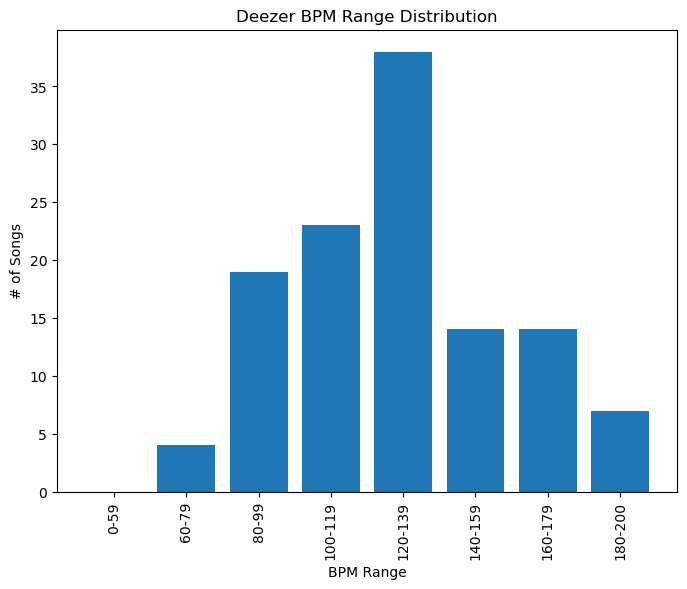

In [21]:
## Make a bar chart on the Deezer music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(dbpm_0to59), len(dbpm_60to79), len(dbpm_80to99), len(dbpm_100to119),
          len(dbpm_120to139), len(dbpm_140to159), len(dbpm_160to179), len(dbpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Deezer BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("../Output/Deezer BPM Range Distribution_Q1.png")
plt.show()